In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,12
import pandas as pd
import matplotlib.pyplot as plt
Players =  pd.read_csv('Players.csv')
player_data = pd.read_csv('player_data.csv')
Seasons_Stats = pd.read_csv('Seasons_Stats.csv')
stats = Players.merge(Seasons_Stats,left_on='Player', right_on='Player', how='inner')
stats = stats[['Player','Age','Year','PTS']]
stats = stats.merge(player_data,left_on='Player', right_on='name', how='inner')
stats = stats[['Year','Age','position','PTS']]
#Зависимость заработанных очков от позиции игрока за все все года
point_position = stats.groupby(['position']).sum()['PTS']

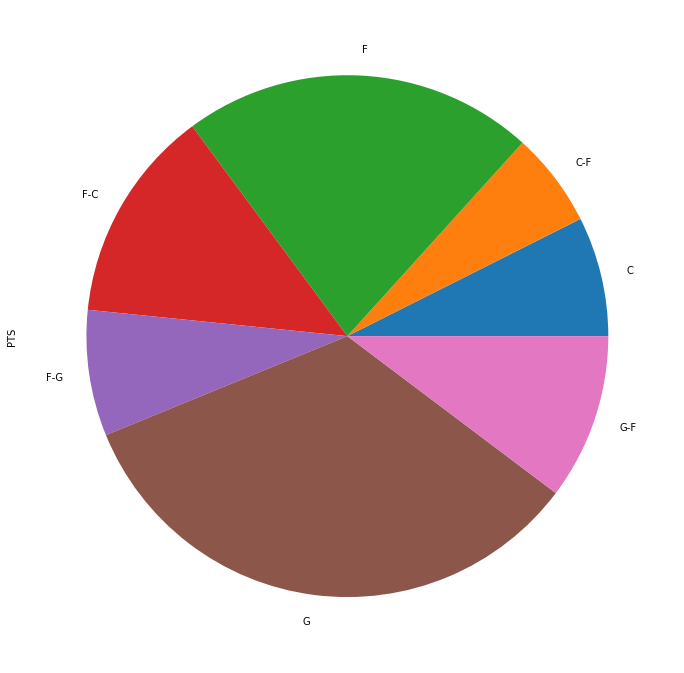

In [63]:
point_position.plot(kind='pie', y='Count')

In [64]:
stats_pts=stats.groupby(['Year']).sum()['PTS'].reset_index(name='sum')
stats_pts.columns = ['Year', 'sum']
stats_count=stats['Year'].value_counts().reset_index(name='count')
stats_count.columns = ['Year', 'count']
st = stats_count.merge(stats_pts,left_on='Year', right_on='Year', how='inner')
st.head()

,Year,count,sum
0,2015.0,664,281358.0
1,2011.0,629,282948.0
2,2014.0,617,273552.0
3,2008.0,602,263845.0
4,2017.0,601,285534.0


Text(0, 0.5, 'Год')

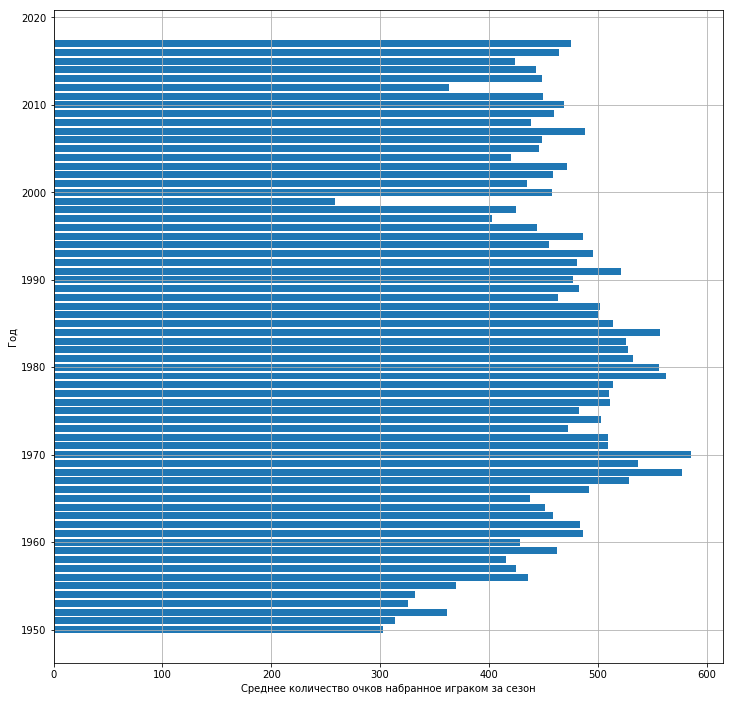

In [65]:
plt.barh(st['Year'], st['sum']/st['count'])
plt.grid()
plt.xlabel('Среднее количество очков набранное играком за сезон')
plt.ylabel('Год')

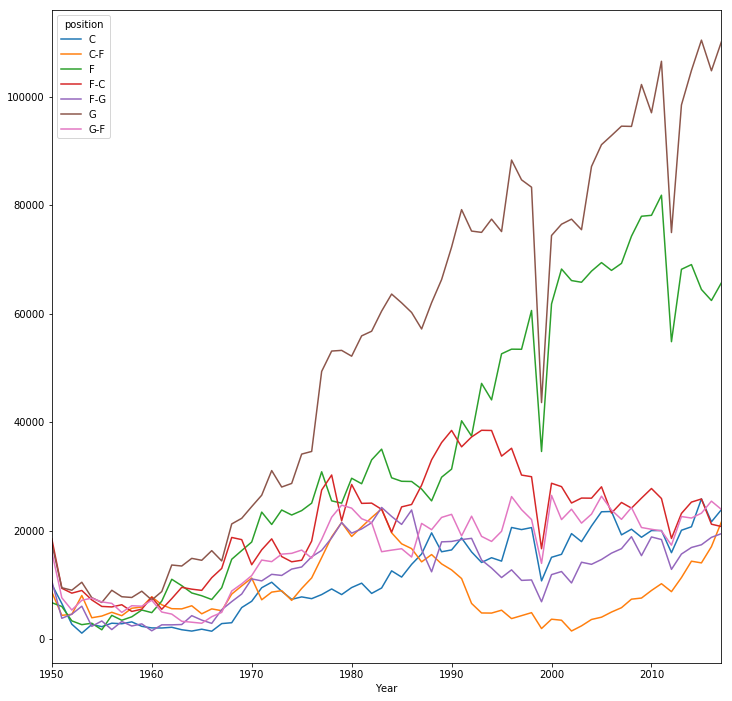

In [66]:
#Количество заработанных очков по годам в зависимости от позиции
Year_position_pts=stats.groupby(['Year','position']).sum()['PTS']
Year_position_pts.unstack('position').plot()

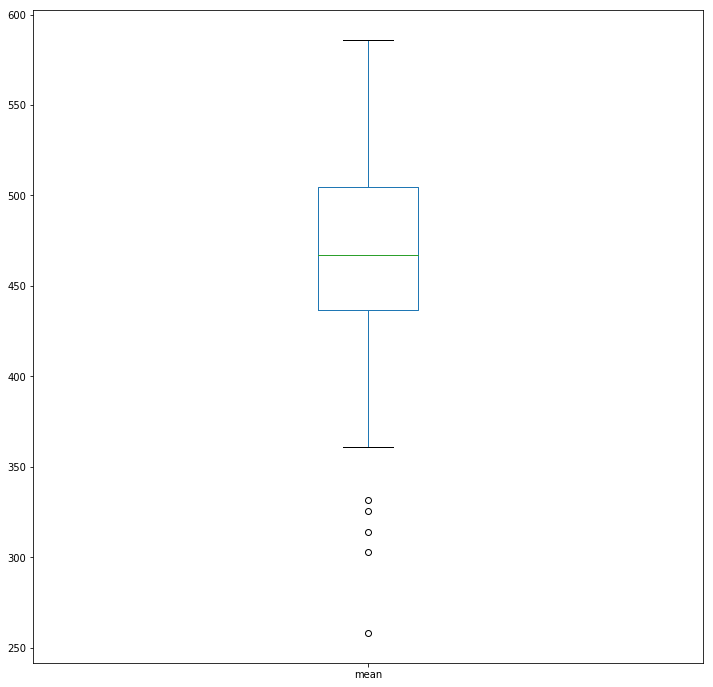

In [67]:
st['mean']=st['sum']/st['count']
st['mean'].plot(kind='box')

In [68]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [69]:
#Среднее количество заработанных очков по годам в зависимости от позиции
#Цель определить возраст игроков по позициям с максимально набранным количеством очков за сезон
Age_pts=stats.groupby(['Age','position']).mean()['PTS'].reset_index(name='mean')
Age_pts.columns = ['Age','position', 'mean']
Age_pts.head(10)

,Age,position,mean
0,18.0,C,70.750000
1,18.0,F,36.000000
2,18.0,F-C,136.250000
3,18.0,F-G,451.000000
4,18.0,G-F,309.000000
5,19.0,C,221.136364
6,19.0,C-F,426.666667
7,19.0,F,414.218750
8,19.0,F-C,335.625000
9,19.0,F-G,897.142857


In [71]:
trace0 = go.Scatter(
    x=Age_pts['Age'],
    y=Age_pts['mean'],
    mode = 'markers+text',
    text = Age_pts['position'],
    textposition='bottom center'
)

data = [trace0]
layout = {'title': 'The average number of points on the position, depending on age'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)